#Hello!
In this notebook, we will prepare our data and ensure the type of each column is numerical
we will also select the features for our model
* We have 2 datasets :
1.  Public Data from kaggle : https://www.kaggle.com/datasets/aditiharsh/mental-health-dataset
2.  Data collected from a survey via social media

###Chapters :     
1.  Preparing and cleaning of public Data
2.  Preparing and cleaning of collected data
3.  Merging the two dataframes 
4.  Encoding 
5.  Creating a HeatMap for correlation

##1- Preparing and cleaning of public Data

####Importing Data

In [1]:
#Import library
import pandas as pd

In [2]:
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#verify the path
folder_path = "/content/drive/MyDrive/My_work/TuniHack_work/data"
!ls "/content/drive/MyDrive/My_work/TuniHack_work/data"

 data_for_model1.csv
 data_for_model2.csv
'Data_preparation&cleaning&FeatureSelection.ipynb'
 Final_data.csv
 Mental-Health-Questionnaire-2.0.csv
 Mental-Health-Survey-Form-responses.csv
 Model-A.ipynb
 Model-B.ipynb


In [4]:
#assign data 
data_path = folder_path + "/Mental-Health-Questionnaire-2.0.csv"
#read data
public_data = pd.read_csv(data_path)
public_data.head()

,Timestamp,Email address,Name,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,...,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction,Prediction_status
0,09-12-2021 23:54,riyaaditi2@gmail.com,Aditi Harsh,Female,No,Student,Tier 3 (Other cities/towns),Fine,Yes,No,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,36,Yes
1,10-12-2021 08:40,imcrazyashutosh@gmail.com,Ashutosh Kumar,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,No,Yes,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,33,No
2,10-12-2021 21:48,atharv23srivastava@gmail.com,Atharv srivastava,Male,No,Student,"Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kol...",Fine,No,Maybe,...,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,NaN,34,No
3,10-12-2021 21:50,ritulricha22@gmail.com,Rimi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,...,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,NaN,35,Yes
4,10-12-2021 21:55,nisha18054@gmail.com,Jaya singh,Female,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,NaN,33,No


In [5]:
print(public_data.shape)
print(public_data.info())

(158, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 32 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             158 non-null    object 
 1   Email address                                                                                                         158 non-null    object 
 2   Name                                                                                                                  158 non-null    object 
 3   Gender                                                                                                                158 non-null    object 
 4 

####Data cleaning 
* Steps:
1. Remove thoses columns : 
Email address / name / How easy is it for you to take medical leave for a mental health condition? / If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state? / Has the COVID-19 pandemic affected your mental well being? / Prediction / Timestamp

2.  Change column name

2.  Deal with missing values

In [6]:
# 1- Remove unused columns
public_data=public_data.drop(['Name','Email address','How easy is it for you to take medical leave for a mental health condition?',
                              'If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?',
                              'Has the COVID-19 pandemic affected your mental well being?','Prediction','Timestamp'],axis=1)

In [7]:
# 2- Change column name
public_data.rename(columns={'How are you feeling today?': 'Mood (fine,good,sad)', 
                            'How confident you have been feeling in your capabilities': 'level of confidence sur 5',
                            'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.': 'level of support from family and friends'}, inplace=True)

In [8]:
# 3- Deal with missing values
public_data.isna().sum()

Gender                                                                                                         0
Are you above 30 years of age?                                                                                 0
Employment Status                                                                                              0
City                                                                                                           0
Mood (fine,good,sad)                                                                                           0
eating and sleeping                                                                                            0
(If sad)have you been in the same mental state for the past few days?                                         11
Is your sadness momentarily or has it been constant for a long time?                                           0
At what time of the day are you extremely low?                                                  

In [9]:
public_data.isna().mean()

Gender                                                                                                        0.000000
Are you above 30 years of age?                                                                                0.000000
Employment Status                                                                                             0.000000
City                                                                                                          0.000000
Mood (fine,good,sad)                                                                                          0.000000
eating and sleeping                                                                                           0.000000
(If sad)have you been in the same mental state for the past few days?                                         0.069620
Is your sadness momentarily or has it been constant for a long time?                                          0.000000
At what time of the day are you extremely low?  

In [10]:
public_data['How comfortable are you in talking about your mental health?'].unique()

array([nan,  1.,  4.,  2.,  5.,  3.])

In [11]:
public_data['How comfortable are you in talking about your mental health?'].mode()


0    5.0
dtype: float64

In [12]:
public_data['How comfortable are you in talking about your mental health?']=public_data['How comfortable are you in talking about your mental health?'].fillna(5.0)

In [13]:
public_data['How likely do you feel yourself vulnerable or lonely?'].mode()

0    4.0
dtype: float64

In [14]:
public_data['How likely do you feel yourself vulnerable or lonely?']=public_data['How likely do you feel yourself vulnerable or lonely?'].fillna(4.0)

In [15]:
public_data['How often do you get offended or angry or start crying ?'].mode()

0    Sometimes
dtype: object

In [16]:
public_data['How often do you get offended or angry or start crying ?']=public_data['How often do you get offended or angry or start crying ?'].fillna('Sometimes')

In [17]:
public_data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].mode()

0    2-5 hours
dtype: object

In [18]:
public_data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?']=public_data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].fillna('2-5 hours')

In [19]:
public_data['How likely do you feel yourself vulnerable or lonely?'].mode()

0    4.0
dtype: float64

In [20]:
public_data['How likely do you feel yourself vulnerable or lonely?']=public_data['How likely do you feel yourself vulnerable or lonely?'].fillna(4.0)

In [21]:
public_data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].mode()

0    No
dtype: object

In [22]:
public_data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?']=public_data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].fillna('No')

In [23]:
public_data['Have you taken any therapy or medication in the near past for mental health?'].mode()

0    No
dtype: object

In [24]:
public_data['Have you taken any therapy or medication in the near past for mental health?']=public_data['Have you taken any therapy or medication in the near past for mental health?'].fillna('No')


In [25]:
public_data['(If sad)have you been in the same mental state for the past few days?'].mode()

0    No
dtype: object

In [26]:
public_data['(If sad)have you been in the same mental state for the past few days?']=public_data['(If sad)have you been in the same mental state for the past few days?'].fillna('No')

In [27]:
public_data.head()

,Gender,Are you above 30 years of age?,Employment Status,City,"Mood (fine,good,sad)",eating and sleeping,(If sad)have you been in the same mental state for the past few days?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,Has there been a sudden and huge change in your life?,...,"If you have a mental health condition, do you feel that it interferes with your work?","How often do you make use of substance abuse(e.g. smoking, alcohol)?",Have you taken any therapy or medication in the near past for mental health?,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?",How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status
0,Female,No,Student,Tier 3 (Other cities/towns),Fine,Yes,No,For some time,Evening,No,...,Yes,Never,No,No,No,2-5 hours,Sometimes,4.0,5.0,Yes
1,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,No,Yes,For some time,Morning,Yes,...,Yes,Never,No,Yes,Yes,2-5 hours,Sometimes,4.0,5.0,No
2,Male,No,Student,"Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kol...",Fine,No,Maybe,Significant time,Evening,No,...,No,Never,No,Maybe,Maybe,More than 10 hours,Sometimes,2.0,5.0,No
3,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,Significant time,Evening,Not sure,...,Yes,Never,No,Yes,Yes,2-5 hours,Often,4.0,5.0,Yes
4,Female,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,Not sad,Afternoon,Yes,...,Yes,Never,No,No,No,5-10 hours,Sometimes,4.0,5.0,No


### 2- Preparation and cleaning of collected data

In [28]:
#verify the path
folder_path = "/content/drive/MyDrive/My_work/TuniHack_work"
!ls "/content/drive/MyDrive/My_work/TuniHack_work"

 data_for_model1.csv
 data_for_model2.csv
'Data_preparation&cleaning&FeatureSelection.ipynb'
 Final_data.csv
 Mental-Health-Questionnaire-2.0.csv
 Mental-Health-Survey-Form-responses.csv
 Model-A.ipynb
 Model-B.ipynb


In [29]:
#assign data 
data_path = folder_path + "/Mental-Health-Survey-Form-responses.csv"
#read data
survey_data = pd.read_csv(data_path)
survey_data.head(n=2)

,Timestamp,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,Have you been eating and sleeping well?,(If sad)have you been in the same mental state for the past few days?,Is your sadness momentarily or has it been constant for a long time? (last month),At what time of the day are you extremely low?,...,"If you have a mental health condition, do you feel that it interferes with your work?",Have you taken any therapy or medication in the near past for mental health?,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?",How often do you get offended or angry or start crying ?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?",How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status
0,03/12/2022 22:48:18,Female,Yes,Student,Tier 1 (large city),Good,No,no,Not sad(<3 days),Afternoon,...,no,no,yes,yes,2-5h,Never,Never,2,1,No
1,03/12/2022 22:48:55,Male,No,Student,Tier 2 (meduim city),Good,Yes,no,Not sad(<3 days),Evening,...,no,no,no,no,2-5h,Sometimes,Never,2,3,Yes


###Data cleaning 

In [30]:
#Remove unused columns 
survey_data=survey_data.drop(['Timestamp'],axis=1)

In [31]:
survey_data.columns

Index(['Gender ', 'Are you above 30 years of age?', 'Employment Status ',
       'City ', 'How are you feeling today?',
       'Have you been eating and sleeping well?',
       '(If sad)have you been in the same mental state for the past few days?',
       'Is your sadness momentarily or has it been constant for a long time? (last month)',
       'At what time of the day are you extremely low?',
       'Has there been a sudden and huge change in your life?',
       'Your stress is related to which of the following areas?',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
       'How confident you have been feeling in your capabilities recently.',
       'Describe how supported you feel by others around you ( your friends, family, or otherwise.)',
       'How frequently have you been doing things that mean something to you or your life? ',
       'If you have a mental health condition, do you feel that it interferes with your work? '

In [32]:
#Change columns names for public data

#Change columns order
column = list(public_data.columns)
ste=[column[16]]
column = column[:16]+column[17:22]+ste+column[22:]
public_data = public_data[column]

In [33]:
public_data.columns = survey_data.columns

In [34]:
survey_data.rename(columns={'Gender ': 'Gender', 
                            'City ': 'City',
                            'Employment Status ': 'Employment Status',
                            'How frequently have you been doing things that mean something to you or your life? ':'How frequently have you been doing things that mean something to you or your life?',
                            'If you have a mental health condition, do you feel that it interferes with your work? ':'If you have a mental health condition, do you feel that it interferes with your work?',
                            'Have you taken any therapy or medication in the near past for mental health? ':'Have you taken any therapy or medication in the near past for mental health?',
                            'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying? ':'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?',
                            'Do you feel bad about yourself or that you are a failure or have let yourself or your family down? ':'Do you feel bad about yourself or that you are a failure or have let yourself or your family down?',
                            'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.? ':'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'}, 
                      inplace=True)
public_data.rename(columns={'Gender ': 'Gender', 
                            'City ': 'City',
                            'Employment Status ': 'Employment Status',
                            'How frequently have you been doing things that mean something to you or your life? ':'How frequently have you been doing things that mean something to you or your life?',
                            'If you have a mental health condition, do you feel that it interferes with your work? ':'If you have a mental health condition, do you feel that it interferes with your work?',
                            'Have you taken any therapy or medication in the near past for mental health? ':'Have you taken any therapy or medication in the near past for mental health?',
                            'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying? ':'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?',
                            'Do you feel bad about yourself or that you are a failure or have let yourself or your family down? ':'Do you feel bad about yourself or that you are a failure or have let yourself or your family down?',
                            'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.? ':'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'}, 
                      inplace=True)

In [35]:
#Cheking missing values
survey_data.isna().sum()

Gender                                                                                                        0
Are you above 30 years of age?                                                                                0
Employment Status                                                                                             0
City                                                                                                          0
How are you feeling today?                                                                                    0
Have you been eating and sleeping well?                                                                       0
(If sad)have you been in the same mental state for the past few days?                                         0
Is your sadness momentarily or has it been constant for a long time? (last month)                             0
At what time of the day are you extremely low?                                                          

In [36]:
#Change the data in some columns! 
public_data['Is your sadness momentarily or has it been constant for a long time? (last month)'].unique()

array(['For some time', 'Significant time', 'Not sad', 'Long time'],
      dtype=object)

In [37]:
survey_data['Is your sadness momentarily or has it been constant for a long time? (last month)'].unique()

array(['Not sad(<3 days)', 'Significant time(between 10 and 20 days)',
       'Not sad(less than 3 days)',
       'For some time (between 3 and 10 days)', 'Long time(over 20 days)'],
      dtype=object)

In [38]:
def change_data(x):
    if x=='Not sad(<3 days)' or x=='Not sad(less than 3 days)': return 'Not sad'
    elif x=='Significant time(between 10 and 20 days)': return 'Significant time'
    elif x=='For some time (between 3 and 10 days)': return 'For some time'
    else : return 'Long time'

In [39]:
survey_data['Is your sadness momentarily or has it been constant for a long time? (last month)'] =survey_data['Is your sadness momentarily or has it been constant for a long time? (last month)'].apply(change_data)

In [40]:
def change_data2(x):
  if x == 'i try not to show' : return 'Little bit'
  else : return x

In [41]:
survey_data["Describe how supported you feel by others around you ( your friends, family, or otherwise.)"] = survey_data["Describe how supported you feel by others around you ( your friends, family, or otherwise.)"].apply(change_data2)

In [42]:
public_data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].unique() 

array(['2-5 hours', 'More than 10 hours', '5-10 hours', '1-2 hours'],
      dtype=object)

In [43]:
survey_data["How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?"].unique()

array(['2-5h', 'more than 10', '1-2h', 'Over 10h', '5-10h'], dtype=object)

In [44]:
def change_data3(x):
  if x=='2-5h' :return '2-5 hours'
  elif x=='5-10h' : return '5-10 hours'
  elif x=='1-2h' : return '1-2 hours'
  else : return 'More than 10 hours'

In [45]:
survey_data["How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?"] = survey_data["How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?"].apply(change_data3)

In [46]:
survey_data["How often do you get offended or angry or start crying ?"].unique()

array(['Never', 'Sometimes', 'Often', 'Very Often', 'Rarely'],
      dtype=object)

In [47]:
public_data["How often do you get offended or angry or start crying ?"].unique()

array(['Sometimes', 'Often', 'Very often', 'Never'], dtype=object)

In [48]:
def change_data4(x): 
  if x=='Rarely' : return 'Sometimes'
  elif x == 'Very Often' : return 'Very often'
  else : return x

In [49]:
survey_data["How often do you get offended or angry or start crying ?"] = survey_data["How often do you get offended or angry or start crying ?"].apply(change_data4)

## 3- Merging the two dataframes

In [50]:
data = pd.concat([survey_data, public_data], ignore_index=True)

In [51]:
data.tail()

,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,Have you been eating and sleeping well?,(If sad)have you been in the same mental state for the past few days?,Is your sadness momentarily or has it been constant for a long time? (last month),At what time of the day are you extremely low?,Has there been a sudden and huge change in your life?,...,"If you have a mental health condition, do you feel that it interferes with your work?",Have you taken any therapy or medication in the near past for mental health?,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?",How often do you get offended or angry or start crying ?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?",How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status
204,Male,Yes,Unemployed,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,Long time,Evening,No,...,Yes,No,Yes,Yes,2-5 hours,Sometimes,Often,4.0,4.0,Yes
205,Male,Yes,Employed,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,Significant time,Evening,No,...,Maybe,No,No,No,2-5 hours,Often,Never,1.0,5.0,No
206,Prefer not to say,No,Self-Employed,Tier 3 (Other cities/towns),Depressed,No,Yes,Not sad,Morning,Yes,...,No,Yes,Yes,No,More than 10 hours,Very often,Very Often,5.0,5.0,Yes
207,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,Maybe,No,Not sad,Evening,Not sure,...,Maybe,Maybe,Maybe,Maybe,2-5 hours,Never,Never,5.0,5.0,Yes
208,Female,Yes,Employed,Tier 2 (Capital cities Eg. Lucknow ),Fine,Yes,Yes,For some time,Morning,Yes,...,Yes,No,No,Maybe,2-5 hours,Sometimes,Never,3.0,3.0,No


In [52]:
print(data.shape)
print(data.info())

(209, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 25 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   Gender                                                                                                      209 non-null    object 
 1   Are you above 30 years of age?                                                                              209 non-null    object 
 2   Employment Status                                                                                           209 non-null    object 
 3   City                                                                                                        209 non-null    object 
 4   How are you feeling today?                                

In [53]:
#save data to .csv file
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/My_work/TuniHack_work/Final_data.csv') 
data.to_csv(filepath)

## 4- Encoding

In [54]:
#data = data.copy()

In [55]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 3,
 'Are you above 30 years of age?': 2,
 'Employment Status': 4,
 'City': 6,
 'How are you feeling today?': 4,
 'Have you been eating and sleeping well?': 3,
 '(If sad)have you been in the same mental state for the past few days?': 6,
 'Is your sadness momentarily or has it been constant for a long time? (last month)': 4,
 'At what time of the day are you extremely low?': 3,
 'Has there been a sudden and huge change in your life?': 6,
 'Your stress is related to which of the following areas?': 25,
 'How frequently have you had little pleasure or interest in the activities you usually enjoy?': 4,
 'Describe how supported you feel by others around you ( your friends, family, or otherwise.)': 4,
 'How frequently have you been doing things that mean something to you or your life?': 4,
 'If you have a mental health condition, do you feel that it interferes with your work?': 6,
 'Have you taken any therapy or medication in the near past for mental health?': 6,
 'Having trouble co

In [56]:
{column:list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Female', 'Male', 'Prefer not to say'],
 'Are you above 30 years of age?': ['Yes', 'No'],
 'Employment Status': ['Student', 'Unemployed', 'Employed', 'Self-Employed'],
 'City': ['Tier 1 (large city)',
  'Tier 2 (meduim city)',
  'Tier 3 (little cities/towns)',
  'Tier 3 (Other cities/towns)',
  'Tier 2 (Capital cities Eg. Lucknow )',
  'Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kolkata)'],
 'How are you feeling today?': ['Good', 'Sad', 'Fine', 'Depressed'],
 'Have you been eating and sleeping well?': ['No', 'Yes', 'Maybe'],
 '(If sad)have you been in the same mental state for the past few days?': ['no',
  'maybe',
  'yes',
  'No',
  'Yes',
  'Maybe'],
 'Is your sadness momentarily or has it been constant for a long time? (last month)': ['Not sad',
  'Significant time',
  'For some time',
  'Long time'],
 'At what time of the day are you extremely low?': ['Afternoon',
  'Evening',
  'Morning'],
 'Has there been a sudden and huge change in your life?': ['no',
  'not sure',
 

In [57]:
{column:len(data[column].unique()) for column in data.select_dtypes('float64').columns}

{'How likely do you feel yourself vulnerable or lonely?': 5,
 'How comfortable are you in talking about your mental health?': 5}

In [58]:
{column:len(data[column].unique()) for column in data.select_dtypes('int64').columns}


{'How confident you have been feeling in your capabilities recently.': 5}

In [59]:
{column:len(data[column].unique()) for column in data.select_dtypes('bool').columns}

{}

In [60]:
data["City"].unique()

array(['Tier 1 (large city)', 'Tier 2 (meduim city)',
       'Tier 3 (little cities/towns)', 'Tier 3 (Other cities/towns)',
       'Tier 2 (Capital cities Eg. Lucknow )',
       'Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kolkata)'],
      dtype=object)

In [61]:
def encode_status(x):
    if x=='Student':
        return 0
    elif x=='Unemployed':
        return 1
    elif x=='Employed':
        return 2
    else : return 3

In [62]:
def encode_gender(x):
    if x=='Female':
        return 0
    elif x=='Male':
        return 1
    else:
        return 2

In [63]:
def encode_city(x):
  if x=='Tier 3 (Other cities/towns)': return 3
  elif x=='Tier 2 (Capital cities Eg. Lucknow )': return 2
  else : return 3

In [64]:
data['Employment Status'] = data['Employment Status'].apply(encode_status)

In [65]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [66]:
data['City'] = data['City'].apply(encode_city)

In [67]:
target='Prediction_status'
binary_features=[
    'Are you above 30 years of age?',
     'Have you been eating and sleeping well?'
]
ordinal_features=[
    'How are you feeling today?',
    'Is your sadness momentarily or has it been constant for a long time? (last month)',
    'At what time of the day are you extremely low?',
    'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
    'Describe how supported you feel by others around you ( your friends, family, or otherwise.)',
    'How frequently have you been doing things that mean something to you or your life?',
    'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
    'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?',
    'How often do you get offended or angry or start crying ?'
]
nominal_features=[
    '(If sad)have you been in the same mental state for the past few days?',
    'Has there been a sudden and huge change in your life?',
    'Your stress is related to which of the following areas?',
    'If you have a mental health condition, do you feel that it interferes with your work?',
    'Have you taken any therapy or medication in the near past for mental health?',
    'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?',
    'Do you feel bad about yourself or that you are a failure or have let yourself or your family down?'
]

In [68]:
def binary_encode(df,columns,positive_values):
    df=df.copy()
    for column,positive_value in zip(columns,positive_values):
        df[column]=df[column].apply(lambda x: 1 if x==positive_value else 0)
    return df
def ordinal_encode(df,columns,orderings):
    df=df.copy()
    for column,ordering in zip(columns,orderings):
            df[column]=df[column].apply(lambda x:ordering.index(x))
    return df
def nominal_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix)
        df=pd.concat([df, dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [69]:
binary_positive_values = ['Yes' for feature in binary_features]
ordinal_orderings=[
    ['Good','Fine','Sad','Depressed'],
    ['Not sad','For some time','Significant time','Long time'],
    ['Morning','Afternoon','Evening'],
    ['Never','Sometimes','Often','Very Often'],
    ['Highly supportive','Satisfactory','Little bit','Not at all'],
    ['Very Often','Often','Sometimes','Never'],
    ['Never','Sometimes','Often','Very Often'],
    ['1-2 hours','2-5 hours','5-10 hours','More than 10 hours'],
    ['Never','Sometimes','Often','Very often']
]

In [70]:
nominal_prefixes=[
    'smen',
    'change',
    'stress',
    'inter',
    'ther',
    'conc',
    'fbad'
]

In [71]:
data=binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values)

In [72]:
data=nominal_encode(
data,
columns=nominal_features,
prefixes=nominal_prefixes
)

In [73]:
data=ordinal_encode(
data,
columns=ordinal_features,
orderings=ordinal_orderings
)

In [74]:
data.columns

Index(['Gender', 'Are you above 30 years of age?', 'Employment Status', 'City',
       'How are you feeling today?', 'Have you been eating and sleeping well?',
       'Is your sadness momentarily or has it been constant for a long time? (last month)',
       'At what time of the day are you extremely low?',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
       'How confident you have been feeling in your capabilities recently.',
       'Describe how supported you feel by others around you ( your friends, family, or otherwise.)',
       'How frequently have you been doing things that mean something to you or your life?',
       'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?',
       'How often do you get offended or angry or start crying ?',
       'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
       'How likely do you feel yourself vulnerable or lonely?'

In [75]:
data.head()

,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,Have you been eating and sleeping well?,Is your sadness momentarily or has it been constant for a long time? (last month),At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,...,conc_Yes,conc_maybe,conc_no,conc_yes,fbad_Maybe,fbad_No,fbad_Yes,fbad_maybe,fbad_no,fbad_yes
0,0,1,0,3,0,0,0,1,2,3,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,3,0,1,0,2,3,3,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,3,0,1,2,1,1,3,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,3,0,0,0,1,1,1,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,3,2,1,0,1,2,3,...,0,0,1,0,0,0,0,0,1,0


In [76]:
#Encode labels
data=binary_encode(data,columns=['Prediction_status'],positive_values=['Yes'])
data['Prediction_status']

0      0
1      1
2      1
3      0
4      0
      ..
204    1
205    0
206    1
207    1
208    0
Name: Prediction_status, Length: 209, dtype: int64

In [77]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))
print("Remaining missing values:", data.isna().sum().sum())

Remaining non-numeric columns: 0
Remaining missing values: 0


In [78]:
pd.set_option('display.max_columns', None)
#pd.set_option("max_rows", None)
data.tail()

,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,Have you been eating and sleeping well?,Is your sadness momentarily or has it been constant for a long time? (last month),At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how supported you feel by others around you ( your friends, family, or otherwise.)",How frequently have you been doing things that mean something to you or your life?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?",How often do you get offended or angry or start crying ?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?",How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status,smen_Maybe,smen_No,smen_Yes,smen_maybe,smen_no,smen_yes,change_No,change_Not sure,change_Yes,change_no,change_not sure,change_yes,stress_Financial,"stress_Financial, Home","stress_Financial, Personal",stress_Home,"stress_Home, Financial","stress_Home, Financial, Personal","stress_Home, Personal","stress_Home, Work","stress_Home, Work, Financial","stress_Home, Work, Financial, Personal","stress_Home, Work, Financial, Personal, None","stress_Home, Work, Personal","stress_Home, Work, Personal, None",stress_None,stress_Personal,"stress_Personal, Financial","stress_Personal, None","stress_Personal, Work","stress_Personal, Work, Financial","stress_Personal, Work, Financial, Home","stress_Personal, Work, Home",stress_Work,"stress_Work, Financial","stress_Work, Financial, Personal","stress_Work, Personal",inter_Maybe,inter_No,inter_Yes,inter_maybe,inter_no,inter_yes,ther_Maybe,ther_No,ther_Yes,ther_maybe,ther_no,ther_yes,conc_Maybe,conc_No,conc_Yes,conc_maybe,conc_no,conc_yes,fbad_Maybe,fbad_No,fbad_Yes,fbad_maybe,fbad_no,fbad_yes
204,1,1,1,2,0,1,3,2,2,5,1,1,1,1,2,4.0,4.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
205,1,1,2,2,0,1,2,2,2,5,0,1,1,2,0,1.0,5.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
206,2,0,3,3,3,0,0,0,0,1,3,0,3,3,3,5.0,5.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
207,1,0,0,2,1,0,0,2,0,5,3,3,1,0,0,5.0,5.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
208,0,1,2,2,1,1,1,0,1,4,0,1,1,1,0,3.0,3.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


## 5- HeatMap for correlation

In [79]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df = data.iloc[:,:18]
df.head()

,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,Have you been eating and sleeping well?,Is your sadness momentarily or has it been constant for a long time? (last month),At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how supported you feel by others around you ( your friends, family, or otherwise.)",How frequently have you been doing things that mean something to you or your life?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?",How often do you get offended or angry or start crying ?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?",How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status
0,0,1,0,3,0,0,0,1,2,3,1,0,1,0,0,2.0,1.0,0
1,1,0,0,3,0,1,0,2,3,3,0,1,1,1,0,2.0,3.0,1
2,1,0,0,3,0,1,2,1,1,3,1,2,3,1,0,3.0,3.0,1
3,1,0,0,3,0,0,0,1,1,1,1,2,1,1,1,1.0,3.0,0
4,0,0,0,3,2,1,0,1,2,3,0,0,1,1,0,4.0,4.0,0


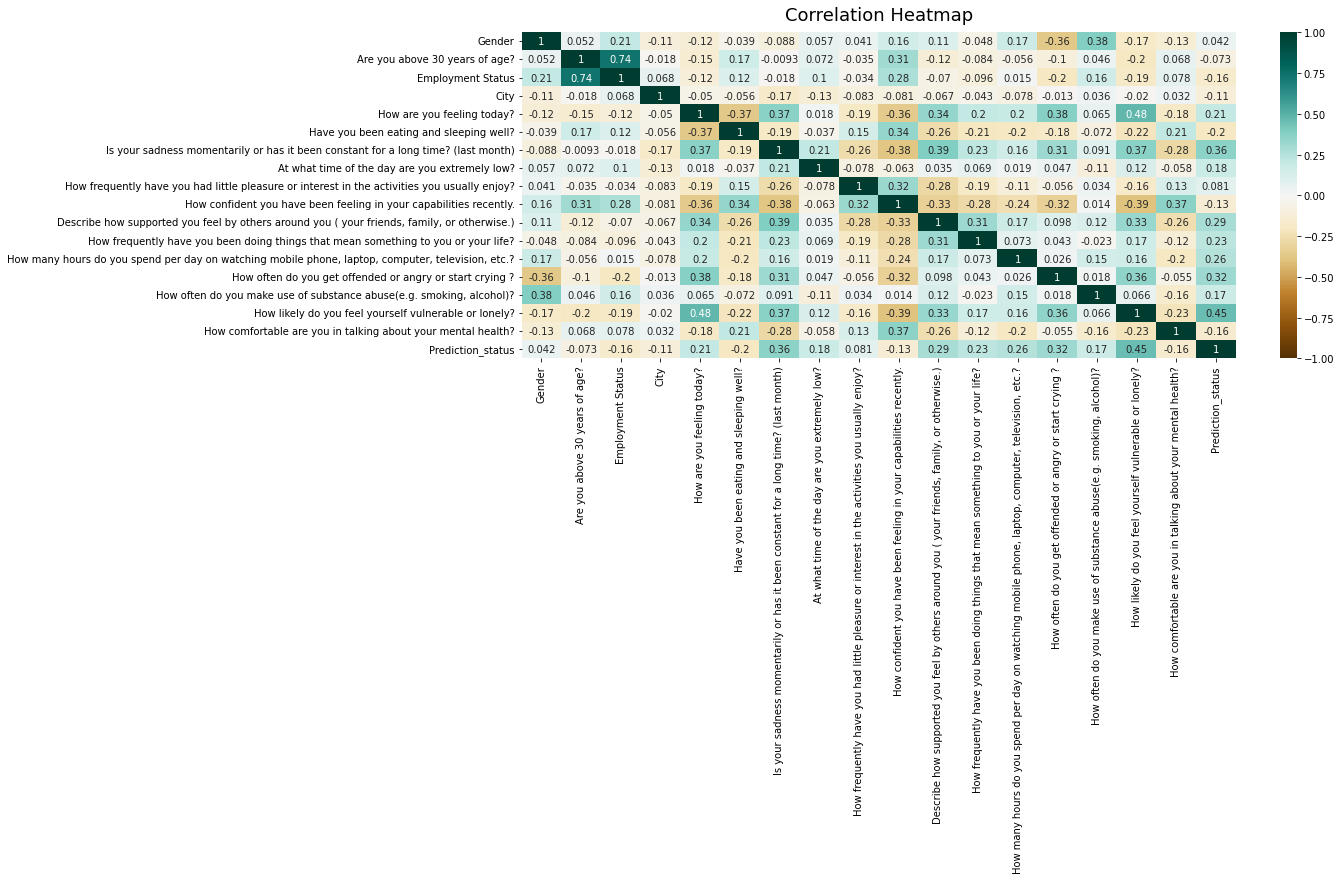

In [81]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [82]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features 
#df.drop(to_drop, axis=1, inplace=True)
print(to_drop)

[]


<ipython-input-82-deb015215022>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


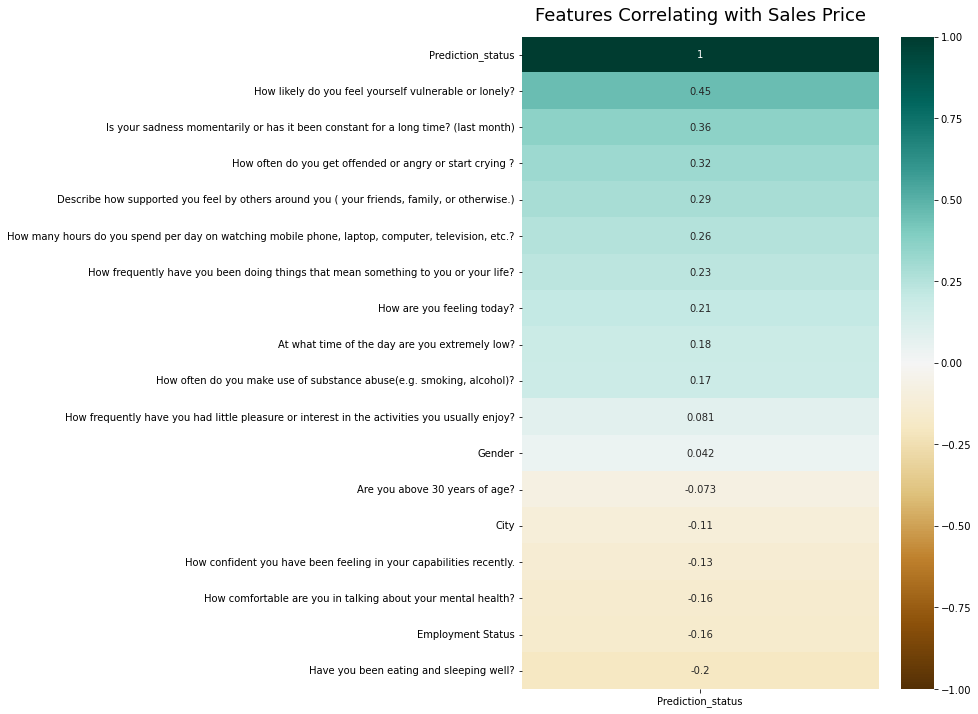

In [83]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Prediction_status']].sort_values(by='Prediction_status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);


In [84]:
df.columns

Index(['Gender', 'Are you above 30 years of age?', 'Employment Status', 'City',
       'How are you feeling today?', 'Have you been eating and sleeping well?',
       'Is your sadness momentarily or has it been constant for a long time? (last month)',
       'At what time of the day are you extremely low?',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
       'How confident you have been feeling in your capabilities recently.',
       'Describe how supported you feel by others around you ( your friends, family, or otherwise.)',
       'How frequently have you been doing things that mean something to you or your life?',
       'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?',
       'How often do you get offended or angry or start crying ?',
       'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
       'How likely do you feel yourself vulnerable or lonely?'

* Our first model will treat the following features :     
1.  How are you feeling today?
2.  Describe how supported you feel by others around you ( your friends, family, or otherwise.)
3.  How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?
4.  How likely do you feel yourself vulnerable or lonely?
5.  How often do you get offended or angry or start crying ?
6.  Have you been eating and sleeping well?
7. How frequently have you been doing things that mean something to you or your life?

* The rest of data will be used in the second model

In [85]:
#save data to .csv file
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/My_work/TuniHack_work/data/data_for_model1.csv') 
df.to_csv(filepath)
filepath = Path('/content/drive/MyDrive/My_work/TuniHack_work/data/data_for_model2.csv') 
data.to_csv(filepath)

##End!